In [11]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import datetime 
merged_plot =pd.read_csv('results/merged_plot.csv')
merged_plot['date'] = pd.to_datetime(merged_plot['date'], format='%Y-%m-%d %H:%M:%S')
merged_plot.set_index('date',inplace=True)
merged_plot.head()

,index_count,general_count,personal_count,policy_count,prices_count,index_mean,general_mean,personal_mean,policy_mean,prices_mean,...,INDPRO pc,INDPRO pc std,PCE std,PCE pc,PCE pc std,DSPIC96 std,DSPIC96 pc,DSPIC96 pc std,CPI ∆%,Gas Prices
date,,,,,,,,,,,,,,,,,,,,,
2016-02-01,463,248,47,26,145,14645.0,-0.143145,0.148936,0.192308,-0.001149,...,NaN,NaN,-1.313627,NaN,NaN,-1.456277,NaN,NaN,NaN,NaN
2016-02-02,466,270,42,17,143,15109.5,-0.173457,0.238095,0.352941,0.069930,...,NaN,NaN,-1.314031,NaN,NaN,-1.456236,NaN,NaN,NaN,NaN
2016-02-03,487,301,40,17,135,15586.0,-0.145626,0.000000,0.352941,0.148148,...,NaN,NaN,-1.314435,NaN,NaN,-1.456196,NaN,NaN,NaN,NaN
2016-02-04,503,278,33,21,176,16081.0,-0.055755,0.090909,0.238095,-0.007576,...,NaN,NaN,-1.314838,NaN,NaN,-1.456155,NaN,NaN,NaN,NaN
2016-02-05,508,303,35,26,151,16586.5,-0.122112,0.257143,0.192308,0.056291,...,NaN,NaN,-1.315242,NaN,NaN,-1.456114,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Sentiment Variance')

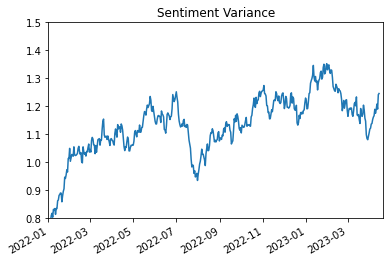

In [14]:

varplot = ['prices var.','general var.']
varplot = ['prices var.']
fig, ax = plt.subplots()

ax.plot(merged_plot['prices var.'])
ax.set_title('Default date handling can cause overlapping labels')
plt.xlim([datetime.date(2022, 1, 1), datetime.date(2023, 4, 20)])
fig.autofmt_xdate()
#Use a more precise date string for the x axis locations in the toolbar.
plt.ylim(.8,1.5)
plt.title('Sentiment Variance')

# ax.annotate('PCE Release', xy=('2023-03-31', 1.05), xytext=('2023-01-01', .9),
#             arrowprops=dict(facecolor='black', shrink=0.05))

# # ax.annotate('July Downside surprise', xy=('2022-07-14', 1.16), xytext=('2022-07-31', 1.3),
# #             arrowprops=dict(facecolor='black', shrink=0.05))

# ax.annotate('June 9% Releases', xy=('2022-07-18', 1.16), xytext=('2022-07-31', 1.3),
#             arrowprops=dict(facecolor='black', shrink=0.05))


#plt.plot(merged_plot['prices var.'])


In [45]:
import yfinance as yf
stock_list = ['^MOVE','^TNX','^GSPC']
data = yf.download(stock_list, start="2015-01-01", end="2023-04-21")
#data.head()
prices = data['Close'].copy()

merged_df_orig = pd.merge(merged_plot, prices, left_index=True, right_index=True, how='inner')

[*********************100%***********************]  3 of 3 completed


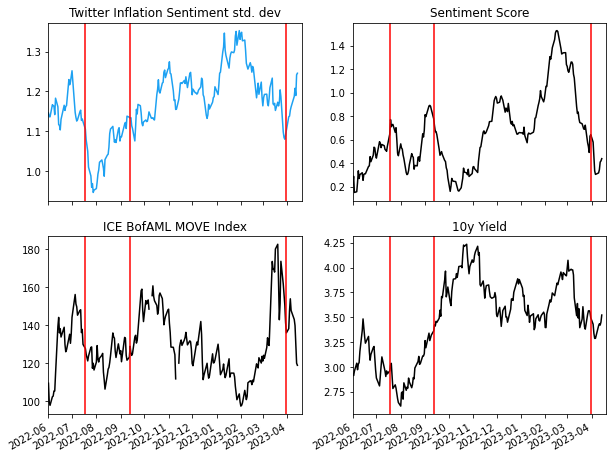

In [52]:
merged_df = merged_df_orig.loc['2022-6-1':'2023-5-1']
fig, axs = plt.subplots(2,2)
plt.rcParams['figure.figsize'] = [10, 8]

plot_dict = {'prices var.':'Twitter Inflation Sentiment std. dev','^GSPC':'S&P 500','^MOVE':'ICE BofAML MOVE Index','^TNX':'10y Yield'}

plot_dict = {'prices var.':'Twitter Inflation Sentiment std. dev','general std.':'Sentiment Score','^MOVE':'ICE BofAML MOVE Index','^TNX':'10y Yield'}

inf_rising = datetime.date(2022,7, 18)
sept_surprise = datetime.date(2022,9, 13)
recent_PCE = datetime.date(2023,3, 31)

row =0
plot_idx=0
fig.autofmt_xdate()
for plotvar in plot_dict:
    
    
    if plot_idx == 2:
            plot_idx = 0
            row = row + 1
       
    if plotvar ==  'prices var.':
        c_plot = '#1DA1F2'  
    else:
        c_plot = 'k'  
        
    axs[row,plot_idx].plot(merged_df[plotvar],color=c_plot)
    axs[row,plot_idx].set_title(plot_dict[plotvar])
    axs[row,plot_idx].set_xlim([datetime.date(2022, 6, 1), datetime.date(2023, 4, 20)])  
    axs[row,plot_idx].axvline(x = inf_rising, color = 'r', label = 'axvline - full height')
    axs[row,plot_idx].axvline(x = sept_surprise, color = 'r', label = 'axvline - full height')
    axs[row,plot_idx].axvline(x = recent_PCE, color = 'r', label = 'axvline - full height')
    #axs[row,plot_idx].axhline(y = 0, color = 'black', linestyle = '-')
    plot_idx +=1
    
        

[Text(0.5, 0, 'prices var.'),
 Text(1.5, 0, 'general std.'),
 Text(2.5, 0, '^GSPC'),
 Text(3.5, 0, '^MOVE'),
 Text(4.5, 0, '^TNX')]

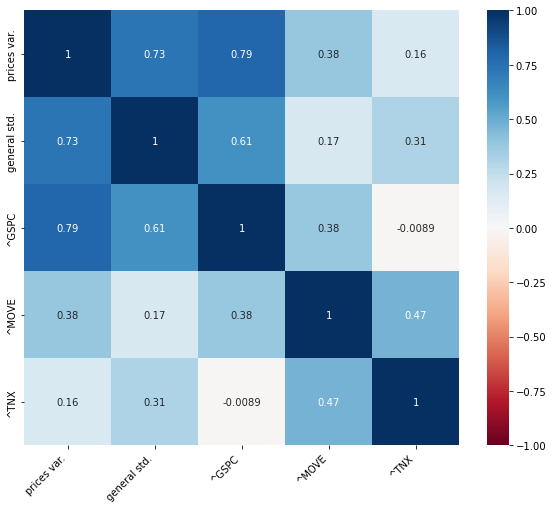

In [47]:
import seaborn as sns 
corr = merged_df_orig[['prices var.','general std.','^GSPC','^MOVE','^TNX']].corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0, annot=True,
    cmap='RdBu',
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [73]:

dftest = pd.read_csv('temp/tempsave.csv',index_col=2)
#dftest = pd.read_csv('temp/tempsave.csv')
#dftest['date'] = pd.to_datetime(dftest['date'], format='%Y-%m-%d %H:%M:%S')
#dftest.set_index('date',inplace=True)
#dftest = dftest.loc['2022-1-1':'2023-1-1']
#dftest = dftest.sort_index(ascending=False)
dftest.head()

,Unnamed: 0,index,tweet_clean,sentiment
date,,,,
2022-03-31 22:44:22,0,0,I came from a poor family . That was how I a s...,-0.8271
2022-03-31 20:11:03,1,1,Supply chain are causing for the majority of a...,0.0000
2022-03-31 23:00:09,2,2,This could very well lead to loss of money in ...,-0.4601
2022-03-31 22:24:43,3,3,Someone who their position is always someone t...,-0.4909
2022-03-31 22:23:00,4,4,who embrace a new and shift cultural in this e...,0.9217


In [88]:
#dfcheck = dftest.loc['2022-1-1':'2023-1-1']

start_date = '2022-07-18'
end_date = '2022-07-19'
mask = (dftest.index > start_date) & (dftest.index <= end_date)
df_trim = dftest.loc[mask]

df = df_trim

#Import csv of keywords derived from michigan survey
df_kws = pd.read_csv("kws/kws.csv")
#Create lists of keywords and keyword categories for aggregagation
kw_list = df_kws['Indicator'].values.tolist()
category_list = df_kws['Category'].values.tolist()
category_list = [*set(category_list)]
print(f"The list of aggregate categories is: {category_list}")

#Detect which keyword was used and store in DF
#Note: this wouldn't be necessary if I had saved the keyword in the initial scraping step: a lesson learned
df['Indicator'] = np.nan
for term in kw_list:
    df['Indicator'] = np.where(df['tweet_clean'].str.contains(term, case=False) == True, term, df['Indicator'])

#Merge in df containing keyword categories
df = pd.merge(df_kws, df, on='Indicator')

#After this point you will have a DF with one row for each tweet, each row will have a sentiment score and associated tags
#df = df[['date', 'sentiment', 'Indicator', 'Category']]

df = df[df['Category'] == 'prices']

df_trim.head()



The list of aggregate categories is: ['personal', 'general', 'policy', 'prices']


/var/folders/3_/4hp02k9s28l0xngsnvfp3jl40000gn/T/ipykernel_41143/500186404.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Indicator'] = np.nan
/var/folders/3_/4hp02k9s28l0xngsnvfp3jl40000gn/T/ipykernel_41143/500186404.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Indicator'] = np.where(df['tweet_clean'].str.contains(term, case=False) == True, term, df['Indicator'])


,Unnamed: 0,index,tweet_clean,sentiment,Indicator
date,,,,,
2022-07-18 22:38:27,295969,309867,I wish you luck . I applied for about 100 for ...,0.7974,Better financially
2022-07-18 21:40:56,295970,309868,If you don ' t think you need to be better the...,0.9336,nan
2022-07-18 21:37:26,295971,309869,Why do I feel so guilty calling for work today...,-0.0814,Better financially
2022-07-18 23:50:00,295972,309870,' s economy and business environment have cons...,0.7650,Business environment
2022-07-18 23:41:34,295973,309871,Does everything feel good . Is the business en...,0.8611,Inflation
